In [3]:
%matplotlib inline
import numpy as np
import pandas
import matplotlib.pyplot as plt


Vamos a empezar cargando una chucheria, en este caso caramelo.

In [4]:
df = pandas.read_csv('data/caramelo_html.csv')
df.keys()

Index([u'seconds'], dtype='object')

Tenemos los datos en un DataFrame de pandas.

Ahora podemos usar matplotlib para pintar el conjunto de datos como una nube de puntos:

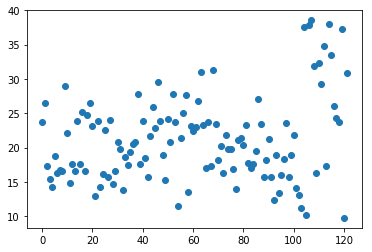

In [5]:
_ = plt.plot(df['seconds'], 'o')

esta representación no va a aportar mucha info, un histograma probablemente sería más sensato:

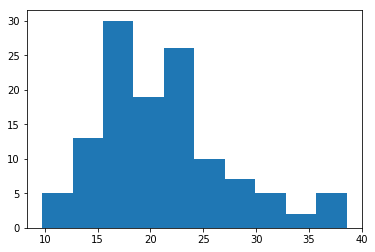

In [19]:
_ = plt.hist(df['seconds'])

Los parámetros de la visualización son muy importantes ya que condicionan lo que vemos: hay patrones que son fáciles de ver bajo ciertas proyecciones y difíciles de ver bajo otras.

Vale la pena jugar con cosas como:
* límites de los ejes
* número de bins en el caso de histograma
* escalas lineales vs. logarítmicas

los mismos datos, partidos en más bins:

Text(0,0.5,'visits')

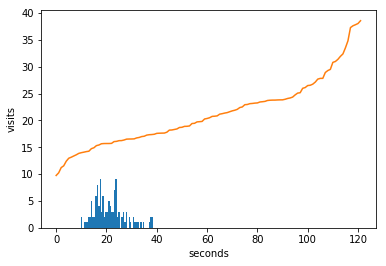

In [20]:
_ = plt.hist(df['seconds'], bins = 50)
plt.plot(df['seconds'].mode())
plt.xlabel('seconds')
plt.ylabel('visits')

Vamos a hacer el resto de chucherias.

Text(0,0.5,'visits')

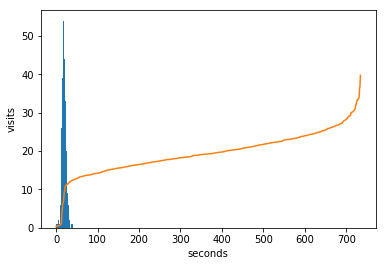

In [21]:
df_marshmallow = pandas.read_csv('data/marshmallow_html.csv')
df_marshmallow.keys()
_ = plt.hist(df_marshmallow['seconds'], bins = 50)
plt.plot(df_marshmallow['seconds'].mode())
plt.xlabel('seconds')
plt.ylabel('visits')

Text(0,0.5,'visits')

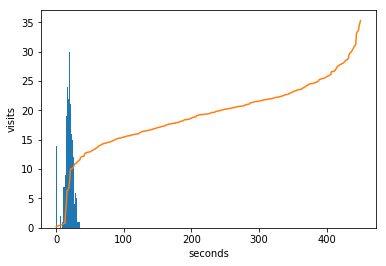

In [22]:
df_chicle = pandas.read_csv('data/chicle_html.csv')
df_chicle.keys()
_ = plt.hist(df_chicle['seconds'], bins = 50)
plt.plot(df_chicle['seconds'].mode())
plt.xlabel('seconds')
plt.ylabel('visits')

Text(0,0.5,'visits')

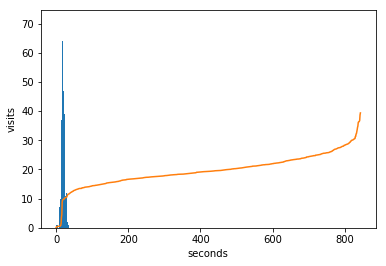

In [23]:
df_lollipop = pandas.read_csv('data/lollipop_html.csv')
df_lollipop.keys()
_ = plt.hist(df_lollipop['seconds'], bins = 50)
plt.plot(df_lollipop['seconds'].mode())
plt.xlabel('seconds')
plt.ylabel('visits')

Text(0,0.5,'visits')

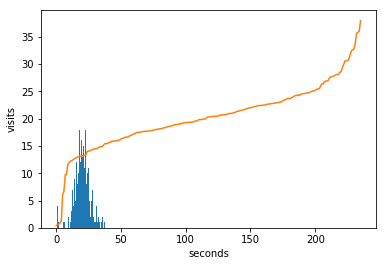

In [24]:
df_sugus = pandas.read_csv('data/sugus_html.csv')
df_sugus.keys()
_ = plt.hist(df_sugus['seconds'], bins = 50)
plt.plot(df_sugus['seconds'].mode())
plt.xlabel('seconds')
plt.ylabel('visits')

Vamos a ver todas las series en el mismo historgrama.

Text(0,0.5,'visits')

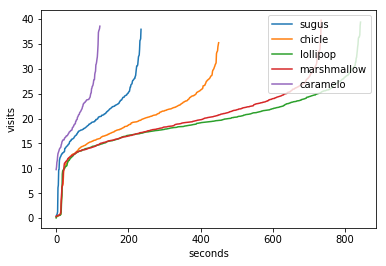

In [25]:
plt.plot(df_sugus['seconds'].mode() , label='sugus')
plt.plot(df_chicle['seconds'].mode(), label='chicle')
plt.plot(df_lollipop['seconds'].mode(), label='lollipop')
plt.plot(df_marshmallow['seconds'].mode(), label='marshmallow')
plt.plot(df['seconds'].mode(), label='caramelo')
plt.legend(loc='upper right')
plt.xlabel('seconds')
plt.ylabel('visits')